In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

First optimization problem - optimal control

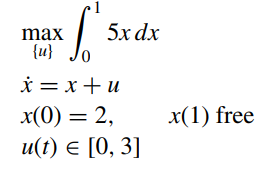

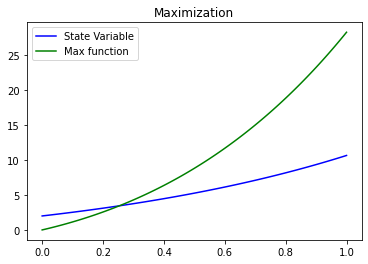

In [4]:
# GEKKO solves this kind of problems, even differential equations
m=GEKKO()
nt=101
m.time=np.linspace(0,1,nt)
x1=m.Var(value=2)
x2=m.Var(value=0)
u=m.Var(value=0,lb=0,ub=3)
p=np.zeros(nt)
p[-1]=1
final=m.Param(value=p)
m.Equation(x2.dt()==5*x1)
m.Equation(x1.dt()==x1+u)
m.Obj(-x2*final)
m.options.IMODE=6
m.solve(disp=False)

# x1: State variable
plt.plot(m.time,x1,c="blue",label="State Variable")
plt.plot(m.time,x2,c="green",label="Max function")
plt.title("Maximization")
plt.legend()
plt.show()

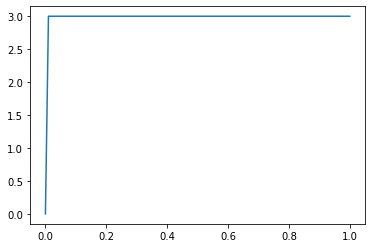

In [6]:
# u: Control variable
plt.plot(m.time,u)
plt.show()

Second problem

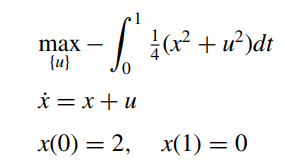

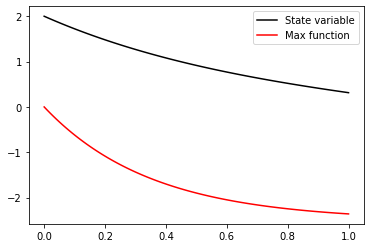

In [7]:
j=GEKKO()
j.time=np.linspace(0,1,nt)
x1=j.Var(value=2)
x2=j.Var(value=0)
u=j.Var(value=0)
l=np.zeros(nt)
l[-1]=1.0
l_final=j.Param(value=l)
j.Equation(x2.dt()==-(1/4)*(x1**2+u**2))
j.Equation(x1.dt()==x1+u)
j.Minimize(l_final*(x1-0)**2)  
j.Obj(-x2*l_final)
j.options.IMODE=6
j.solve(disp=False)

# x1: State variable
plt.plot(j.time,x1,c="black",label="State variable")
plt.plot(j.time,x2,c="red",label="Max function")
plt.legend()
plt.show()

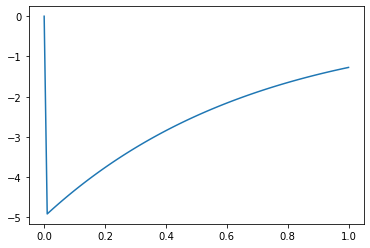

In [9]:
# Control variable
plt.plot(j.time,u)
plt.show()

Third problem - Discount factor

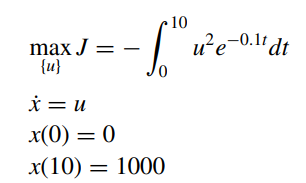

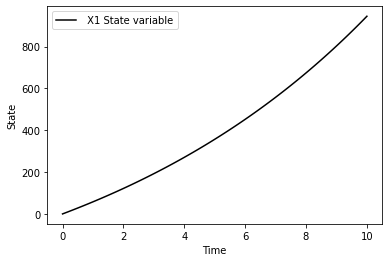

In [13]:
m=GEKKO()
m.time=np.linspace(0,10,nt)
x1=m.Var(value=0)
x2=m.Var(value=0)
u=m.Var(value=0)
l=np.zeros(nt)
l[-1]=1.0
l_final=m.Param(value=l)
t=m.Var(value=0)
m.Equation(t.dt()==1)
m.Equation(x2.dt()==-(u**2)*m.exp(-0.1*t))
m.Equation(x1.dt()==u)
m.Minimize(l_final*(x1-1000)**2)
m.Obj(-x2*l_final)
m.options.IMODE=6
m.solve(disp=False)

plt.plot(m.time,x1,c="black",label=" X1 State variable")
plt.xlabel("Time")
plt.ylabel("State")
plt.legend()
plt.show()

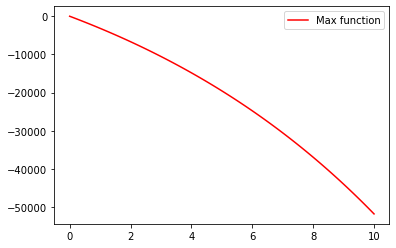

In [14]:
plt.plot(m.time,x2,c="red",label="Max function")
plt.legend()
plt.show()

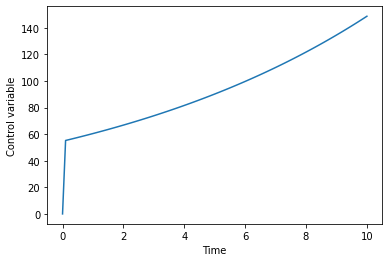

In [16]:
plt.plot(m.time,u)
plt.xlabel("Time")
plt.ylabel("Control variable")
plt.show()